In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_model = df.copy()

In [6]:
df_model.drop(['CustomerID'], axis=1, inplace=True)

In [7]:
df_model.columns = ['Gender','Age', 'AnnualIncome', 'SpendingScore']

In [8]:
#df_model['AnnualIncome'] = df_model['AnnualIncome'].apply(lambda x: x*1000)

In [9]:
df_model.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
df_model['Gender'] = df_model['Gender'].map({'Female': 0, 'Male':1})

In [11]:
df_model.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
df_model.shape

(200, 4)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_model[['AnnualIncome','SpendingScore']])

# <strong> KMeans </strong>

In [14]:
from sklearn.cluster import KMeans

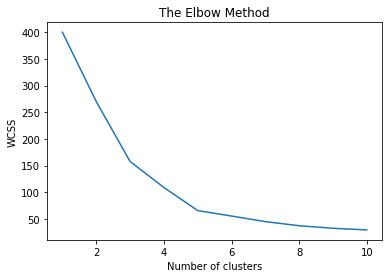

In [15]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 12345)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
wcss[95:]

[]

In [17]:
from sklearn.metrics import silhouette_score

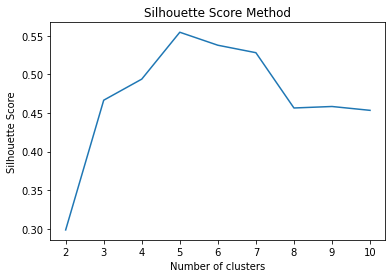

In [18]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=12345)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
km_model = KMeans(n_clusters=5, random_state=12345)
km_model.fit(X)

KMeans(n_clusters=5, random_state=12345)

In [20]:
df_model['ClusterNumber'] = km_model.predict(X)

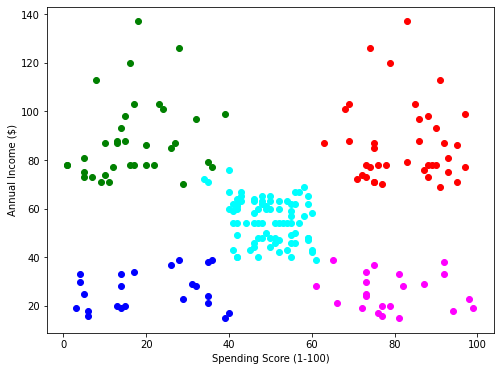

In [33]:
colors = ['red', 'blue', 'green', 'cyan','magenta']
plt.figure(figsize = (8,6))
for i in np.arange(0,5,1):
    plt.scatter(df_model[df_model.ClusterNumber == i]['SpendingScore'], df_model[df_model.ClusterNumber == i]['AnnualIncome'], c=colors[i], label=f'cluster{i}')
plt.ylabel('Annual Income ($)')
plt.xlabel('Spending Score (1-100)')
plt.show()

# <strong> Dendrogram and Agglomerative Clustering </strong>

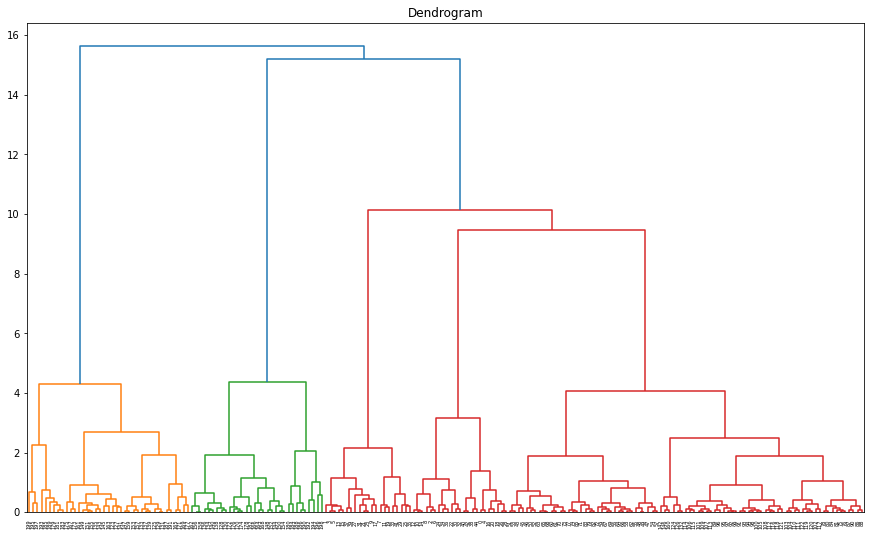

In [24]:
import scipy
plt.figure(figsize = (15,9))
scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(X, method='ward'))
plt.title('Dendrogram')
#plt.grid()
plt.show()

In [25]:
import scipy
scipy.__version__

'1.9.3'

In [27]:
import sklearn

sklearn.__version__

'1.3.1'

In [26]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,linkage="ward", metric="euclidean")
model.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [28]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [29]:
df_model['AggClusterName'] = model.labels_

In [30]:
df_model.head()

,Gender,Age,AnnualIncome,SpendingScore,ClusterNumber,AggClusterName
0,1,19,15,39,1,4
1,1,21,15,81,4,3
2,0,20,16,6,1,4
3,0,23,16,77,4,3
4,0,31,17,40,1,4


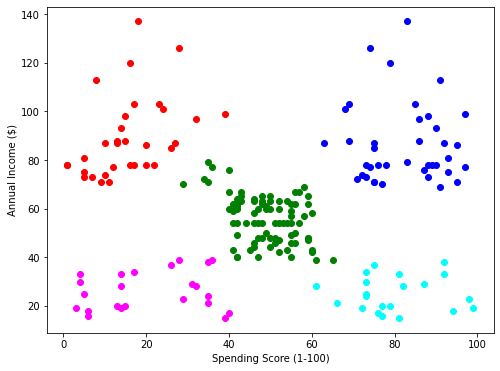

In [32]:
colors = ['red', 'blue', 'green', 'cyan','magenta']
plt.figure(figsize = (8,6))
for i in np.arange(0,5,1):
    plt.scatter(df_model[df_model['AggClusterName'] == i]['SpendingScore'], df_model[df_model['AggClusterName'] == i]['AnnualIncome'], c=colors[i], label=f'cluster{i}')
plt.ylabel('Annual Income ($)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## **DBSCAN**

In [34]:
from sklearn.cluster import DBSCAN

In [62]:
db_model = DBSCAN(eps=0.3, min_samples=4)

In [63]:
df_model['dbCluster'] = db_model.fit_predict(X)

In [68]:
import numpy as np
len(np.unique(db_model.labels_))

9

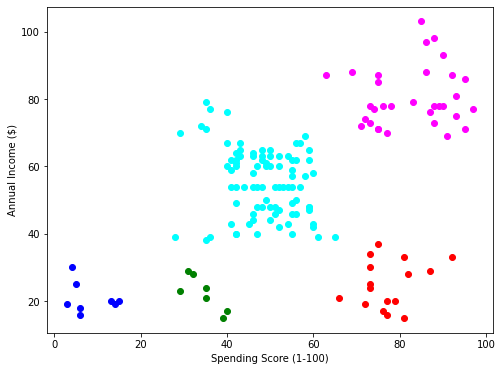

In [65]:
colors = ['red', 'blue', 'green', 'cyan','magenta']
plt.figure(figsize = (8,6))
for i in np.arange(0,5,1):
    plt.scatter(df_model[df_model['dbCluster'] == i]['SpendingScore'], df_model[df_model['dbCluster'] == i]['AnnualIncome'], c=colors[i], label=f'cluster{i}')
plt.ylabel('Annual Income ($)')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [61]:
df_model.tail(10), db_model.

,Gender,Age,AnnualIncome,SpendingScore,ClusterNumber,AggClusterName,dbCluster
190,0,34,103,23,2,0,0
191,0,32,103,69,0,1,1
192,1,33,113,8,2,0,-1
193,0,38,113,91,0,1,1
194,0,47,120,16,2,0,-1
195,0,35,120,79,0,1,-1
196,0,45,126,28,2,0,-1
197,1,32,126,74,0,1,-1
198,1,32,137,18,2,0,-1
199,1,30,137,83,0,1,-1


In [ ]:
for i in range(0.1,2,0.1):
    for j in range(3,7):
        dbmodel = DBSCAN(eps=i, min_samples=j)
        